## 연습문제 Multiply7


앞서 Multiply7을 구현해 놓았다.

이 컨트랙에 이벤트를 추가해서 수정해보자.

geth 또는 ganache 가운데 어느 것이나 선택해서 실행해도 좋다.

아래 주어진 미완성 코드를 구현해서 노드에서 이벤트를 발생시켜 본다.

* 함수는 param4인자를 받아서 곱하기 7 연산을 한다. 8과 16의 연산을 실행하자. 그 결과는 56과 112가 출력될 것이다.

* 이벤트로 넘겨주는 매개변수 param1은 누가 이 함수를 호출했는지 (address), param2는 언제 호출되었는지 (timestamp), 마지막으로 param3는 연산결과를 출력한다.



* 미완성 코드
```
contract Multiply7Event {

    event Print(param1, param2, param3);

    function multiply(param4)

}
```


### ganache

### 1. 개발

In [1]:
%%writefile ../src/Multiply7Event.sol
pragma solidity >=0.5.0;

contract Multiply7Event {
    event Print(address addr, uint256 timestamp, uint ret);
    
    function multiply(uint input) public {
        uint ret = 7 * input;
        emit Print(msg.sender, now, ret);
    }
}

Writing ../src/Multiply7Event.sol


### 2. 컴파일

In [2]:
!solc --abi --bin --gas ../src/Multiply7Event.sol


======= ../src/Multiply7Event.sol:Multiply7Event =======
Gas estimation:
construction:
   105 + 53800 = 53905
external:
   multiply(uint256):	1862
Binary:
6080604052348015600f57600080fd5b5061010d8061001f6000396000f3fe6080604052348015600f57600080fd5b506004361060285760003560e01c8063c6888fa114602d575b600080fd5b605660048036036020811015604157600080fd5b81019080803590602001909291905050506058565b005b60008160070290507f91da4985ab616136202f4e81fd2d8cac1eb12591132d609cece407f7c6fb9205334283604051808473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001838152602001828152602001935050505060405180910390a1505056fea2646970667358221220666c8c551390bd4d52318bfa60bbea94a92964ac82a39710424bc65e6f137eea64736f6c63430006040033
Contract JSON ABI
[{"anonymous":false,"inputs":[{"indexed":false,"internalType":"address","name":"addr","type":"address"},{"indexed":false,"internalType":"uint256","name":"timestamp","type":"uint256"},{"indexed":false,"internalType":"uint256",

### 3. 배포

In [3]:
%%writefile ../src/Multiply7EventDeploy.js
var Web3 = require('web3');
var web3;
if (typeof web3 !== 'undefined') {
    web3 = new Web3(web3.currentProvider);
} else {
    web3 = new Web3(new Web3.providers.HttpProvider("http://localhost:8345"));
}

var _abi = [{"anonymous":false,"inputs":[{"indexed":false,"internalType":"address","name":"addr","type":"address"},{"indexed":false,"internalType":"uint256","name":"timestamp","type":"uint256"},{"indexed":false,"internalType":"uint256","name":"ret","type":"uint256"}],"name":"Print","type":"event"},{"inputs":[{"internalType":"uint256","name":"input","type":"uint256"}],"name":"multiply","outputs":[],"stateMutability":"nonpayable","type":"function"}];
var _bin = "0x"+"6080604052348015600f57600080fd5b5061010d8061001f6000396000f3fe6080604052348015600f57600080fd5b506004361060285760003560e01c8063c6888fa114602d575b600080fd5b605660048036036020811015604157600080fd5b81019080803590602001909291905050506058565b005b60008160070290507f91da4985ab616136202f4e81fd2d8cac1eb12591132d609cece407f7c6fb9205334283604051808473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001838152602001828152602001935050505060405180910390a1505056fea2646970667358221220666c8c551390bd4d52318bfa60bbea94a92964ac82a39710424bc65e6f137eea64736f6c63430006040033";

async function deploy() {
    const accounts = await web3.eth.getAccounts();
    console.log("Deploying the contract from "+accounts[0]);
    var deployed = await new web3.eth.Contract(_abi)
        .deploy({data:_bin})
        .send({from:accounts[0], gas:1000000}, function(err, transactionHash) {
            if (!err)
                console.log("hash: "+transactionHash);
        });
    console.log("The contract deployed to: "+deployed.options.address)
}
deploy()

Writing ../src/Multiply7EventDeploy.js


In [4]:
!node ../src/Multiply7EventDeploy.js

Deploying the contract from 0xbEa640f824777De07099b5FA38E85090b8841262
hash: 0x7e77099a8e888ea25b74af0691a853536384572c029587d822fe3a1bd7686da7
The contract deployed to: 0x971fA2B124718373AD7f34bbf2606E4165B4D94a


### 4. 사용

In [20]:
%%writefile ../src/Multiply7EventWsUse.js
var Web3 = require('web3');
var web3 = new Web3(new Web3.providers.WebsocketProvider("http://localhost:8345"));

var _abi = [{"anonymous":false,"inputs":[{"indexed":false,"internalType":"address","name":"addr","type":"address"},{"indexed":false,"internalType":"uint256","name":"timestamp","type":"uint256"},{"indexed":false,"internalType":"uint256","name":"ret","type":"uint256"}],"name":"Print","type":"event"},{"inputs":[{"internalType":"uint256","name":"input","type":"uint256"}],"name":"multiply","outputs":[],"stateMutability":"nonpayable","type":"function"}];
var _contract = new web3.eth.Contract(_abi, "0x971fA2B124718373AD7f34bbf2606E4165B4D94a");

var event = _contract.events.Print({fromBlock:0}, function (err, ret) {
    if (!err)
        console.log("Event Fired: "+JSON.stringify(ret.returnValues));
});

async function doIt() {
    const accounts = await web3.eth.getAccounts();
    console.log("\nAccount: "+accounts[0]);
    const balanceBefore = await web3.eth.getBalance(accounts[0]);
    console.log("Balance Before: "+balanceBefore);
    
    // multiply 8
    const value8 = await _contract.methods.multiply(8)
        .send({from:accounts[0], gas:1000000})
    console.log("\n\n---> function called 8"+JSON.stringify(value8.events.Print.returnValues));
    
    // multiply 16
    const value16 = await _contract.methods.multiply(16)
        .send({from:accounts[0], gas:1000000})
    console.log("\n\n---> function called 16"+JSON.stringify(value16.events.Print.returnValues));
    
    const balanceAfter = await web3.eth.getBalance(accounts[0]);
    console.log("\nBalance After: "+balanceAfter);
    console.log("Balance diff: "+(balanceBefore - balanceAfter));
}
doIt()

Overwriting ../src/Multiply7EventWsUse.js


In [6]:
!node ../src/Multiply7EventWsUse.js

^C


jupyter notebook에서 실행 시 대기 상태가 지속되어 단말 실행 화면 첨부합니다.

In [9]:
from IPython.display import Image

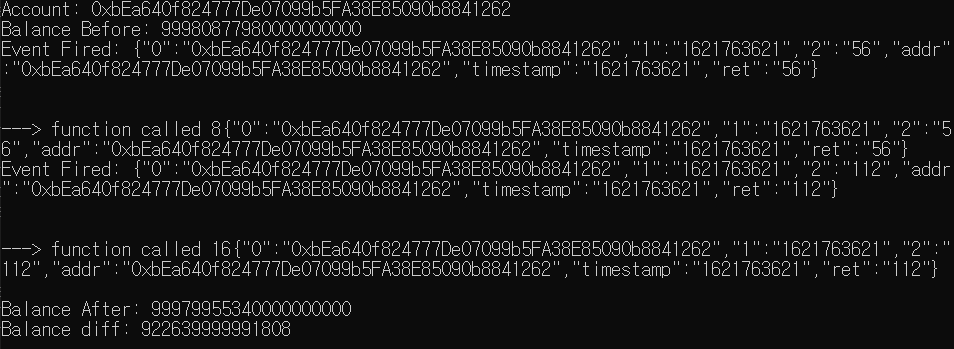

In [21]:
Image("Multiply7Event.PNG")

출력된 function called 8의 경우 해당 returnValues의 ret에 8 * 7의 값인 56이 출력되었습니다.    
마찬가지로, 출력된 function called 16의 경우 ret에 16 * 7의 값인 112가 출력되었습니다.